# _**Employee Attrition**_ #

1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

2. EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     1341 non-null   int64 
 1   age_years              1341 non-null   int64 
 2   travel_freq            1341 non-null   object
 3   daily_salary           1341 non-null   int64 
 4   work_division          1341 non-null   object
 5   commute_distance       1341 non-null   int64 
 6   education_level        1341 non-null   int64 
 7   degree_field           1341 non-null   object
 8   headcount              1341 non-null   int64 
 9   env_satisfaction       1341 non-null   int64 
 10  sex                    1341 non-null   object
 11  hourly_wage            1341 non-null   int64 
 12  job_engagement         1341 non-null   int64 
 13  position_level         1341 non-null   int64 
 14  job_title              1341 non-null   object
 15  job_satisfaction     

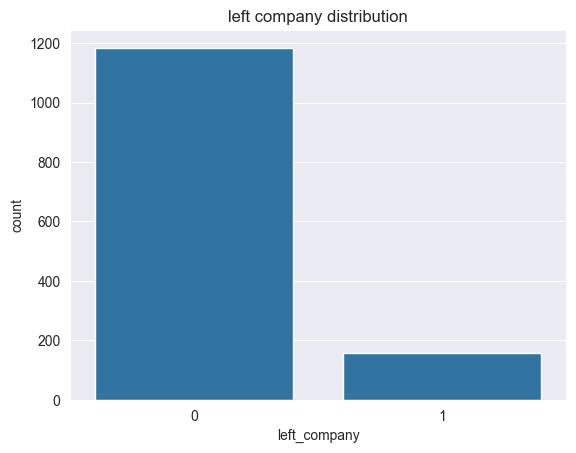

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


print(train.info())
print(train['left_company'].value_counts())


train.fillna(train.median(numeric_only=True),inplace=True)

label_cols = ['travel_freq', 'work_division', 'degree_field', 'sex', 'job_title', 'marital_state', 'is_adult', 'overtime_status']

train = pd.get_dummies(train, columns=label_cols, drop_first=True)
test = pd.get_dummies(test, columns=label_cols, drop_first=True)


test = test.reindex(columns = train.drop(columns=['left_company']).columns, fill_value=0)


sns.countplot(x='left_company', data=train)
plt.title('left company distribution')
plt.show()

3. Baseline Model: Logistic Regression

f1 : 0.2702702702702703
recall: 0.1724137931034483
precision: 0.625
roc_auc: 0.8311781609195401


C:\Users\victus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


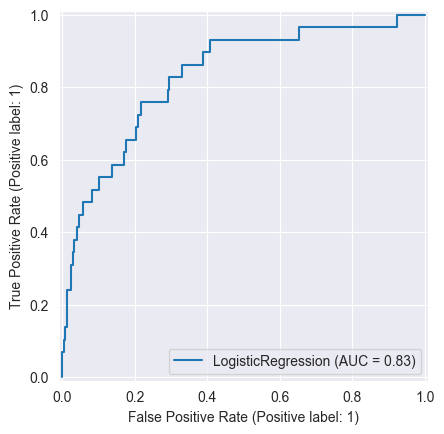

In [5]:
x = train.drop(['ID','left_company'], axis=1)
y = train['left_company']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'f1 : {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

Advanced Models : XGBoost and Random Forest

Random Forest
f1 : 0.06451612903225806
recall: 0.034482758620689655
precision: 0.5
roc_auc: 0.8630028735632184


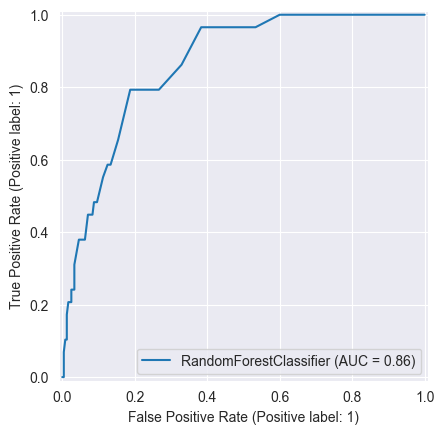

------------------------------------------------------------------------
XGBoost
f1 : 0.34146341463414637
recall: 0.2413793103448276
precision: 0.5833333333333334
roc_auc: 0.8181034482758621


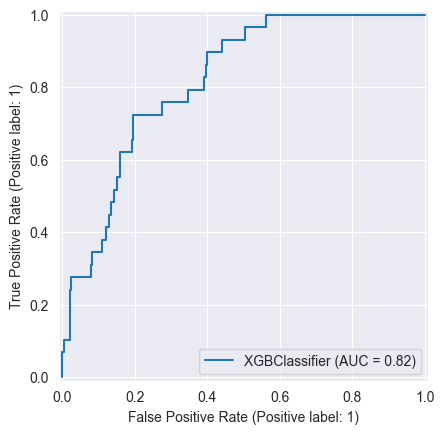

In [17]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Random Forest')
print(f'f1 : {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

print('------------------------------------------------------------------------')

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('XGBoost')
print(f'f1 : {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}')


RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

5. Handeling Imbalanced Data

f1 : 0.8439125910509886
recall: 0.8582010582010582
precision: 0.8300921187308086
roc_auc: 0.7780172413793104


C:\Users\victus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


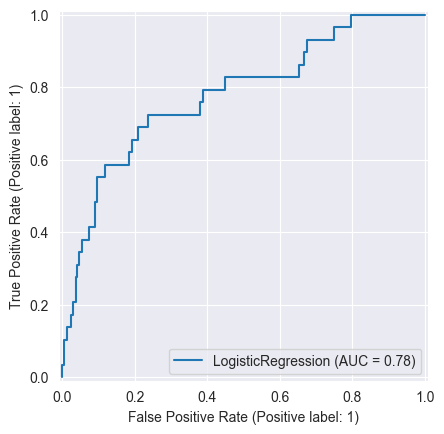

In [18]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model_smote =  LogisticRegression(max_iter=1000)
model_smote.fit(x_resampled, y_resampled)
smote_pred = model_smote.predict(x_resampled)

print(f'f1 : {f1_score(y_resampled, smote_pred)}')
print(f'recall: {recall_score(y_resampled, smote_pred)}')
print(f'precision: {precision_score(y_resampled, smote_pred)}')
print(f'roc_auc: {roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1])}')

RocCurveDisplay.from_estimator(model_smote, X_test, y_test)
plt.show()